In [129]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from BICS_ABM import BICS_ABM

/Users/eroubenoff/BICS_ABM/BICS_ABM.py:156: DtypeWarning: Columns (26,63,64,65,66,68,69,70,71,72,73,76,86,139,140,149,175,176,177,191,195,205,213,214,215,216,217,218,219,220,221,222,223,224,225,227,228,229) have mixed types. Specify dtype option on import or set low_memory=False.
  BICS = pd.read_csv("data/df_all_waves.csv", dtype_backend="numpy_nullable")


In [133]:
BICS_ABM(N_HH = 4, MAX_DAYS = 1, silent=True)._pop

array([[ 0.,  5.,  1.,  0.,  0.,  2., -1.,  0.],
       [ 0.,  5.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  2.,  1.,  2.,  0.,  2., -1.,  0.],
       [ 0.,  4.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 1.,  5.,  1., 15.,  0.,  1.,  0.,  0.],
       [ 1.,  6.,  0.,  3.,  0.,  3.,  0.,  0.],
       [ 1.,  3.,  0.,  0.,  0.,  0., -1.,  0.],
       [ 2.,  1.,  1.,  1.,  0.,  2., -1.,  0.],
       [ 2.,  2.,  0.,  4.,  0.,  3., -1.,  1.],
       [ 2.,  6.,  0.,  5.,  0.,  1.,  0.,  1.],
       [ 3.,  5.,  0.,  5.,  0.,  3., -1.,  0.],
       [ 3.,  6.,  1.,  1.,  0.,  2.,  0.,  1.],
       [ 3.,  3.,  0., 14.,  0.,  2., -1.,  0.]])

In [4]:
G = nx.Graph()

In [13]:
G.add_nodes_from([
    (1, {'hhid': 1}),
    (2, {'hhid': 1}),
    (3, {'hhid': 1}),
    (4, {'hhid': 2}),
    (5, {'hhid': 2}),
    (6, {'hhid': 3}),
    (7, {'hhid': 3}),
    (8, {'hhid': 4}),
    (9, {'hhid': 5}),
    (10, {'hhid': 5})
])

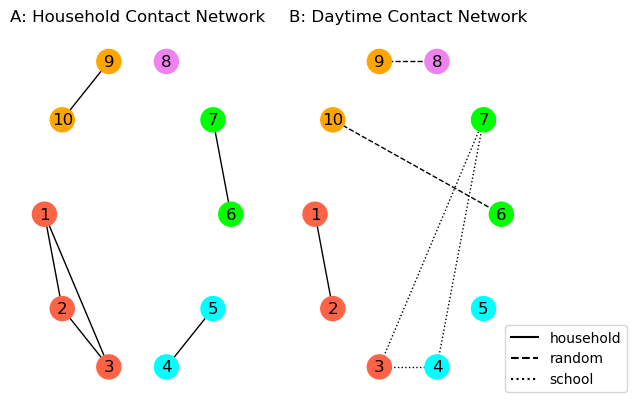

In [128]:
G.remove_edges_from(list(G.edges))
G.add_edges_from([
    (1, 2, {'type':'household'}),
    (2, 3, {'type':'household'}),
    (1, 3, {'type':'household'}),
    (4, 5, {'type':'household'}),
    (6, 7, {'type':'household'}),
    (9, 10, {'type':'household'}),
])
cmap = {1: 'tomato', 2: 'cyan', 3: 'lime', 4: 'violet', 5: 'orange'}
cmap = [cmap[v] for v in nx.get_node_attributes(G, 'hhid').values()]
fig, ax = plt.subplots(ncols=2, nrows= 1)
nx.draw_shell(G, with_labels = True, node_color=cmap, ax = ax[0])


G.remove_edges_from(list(G.edges))
G.add_edges_from([
    (1, 2, {'type': 'household'}),
    (8, 9, {'type': 'random'}),
    (10, 6, {'type': 'random'}),
    (4, 7, {'type': 'school'}),
    (3, 7, {'type': 'school'}),
    (3, 4, {'type': 'school'})
])
emap = {'household': 'solid', 'random': 'dashed', 'school': 'dotted'}
emap = [emap[v] for v in nx.get_edge_attributes(G, 'type').values()]
nx.draw_shell(G, with_labels = True, node_color=cmap, style = emap, ax = ax[1])

ax[0].title.set_text("A: Household Contact Network")
ax[1].title.set_text("B: Daytime Contact Network")

line1, = plt.plot([], color = 'black', label="household", linestyle='solid')
line2, = plt.plot([], color = 'black', label="random", linestyle='dashed')
line3, = plt.plot([], color = 'black', label="school", linestyle='dotted')

# Create a legend for the first line.
ax[1].legend(handles=[line1, line2, line3], loc='lower right', bbox_to_anchor=(1.5, 0))
fig.savefig('network_diagram.png', bbox_inches='tight', dpi=300)